
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

***

This assignment is due on Canvas by **11:59 PM on Monday July 6**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***


### [20 points] Problem 1

To play a game, you have a box containing 20 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 15 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 5 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand (and LaTeX your solutions) unless otherwise stated (but don't be afraid to simulate to check your result!).

**Part A**: You roll your die one time.  What is the probability of the event $R_6$, that you roll a 6?  Include at least 4 decimal places in your final answer.

**Solution**: 

 P($R_6$) = (P($R_6$ | F) * P(F)) + (P($R_6$ | S) * P(S)) + (P($R_6$ | T) * P(T))  
          = (0 * .5) + (.167 * .375) + (.05 * .125)  
          = 0 + .0625 + .00625  
          = 0.06875  

**Part B**: Suppose you roll a 6.  What is the probability that the die you chose from the box is a Six-sided die? 

**Solution**:  

P(S | $R_6$) = (P($R_6$ | S) * P(S)) / (P($R_6$))  
             = (.167 * .375) / (.06875)  
             = 0.9091  

**Part C:**  Are the events $R_6$ and $S$ independent?  Justify your answer **using math**.

**Solution:**  

If P($R_6$ | S) and P($R_6$) are the same, then they are independant.  
P($R_6$ | S) = 0.0625  
P($R_6$) = 0.06875  
Since P($R_6$ | S) and P($R_6$) are not equal, $R_6$ and S are not independant.

**Part D:** Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$. 

**Solution:**  

P($E_1$) = (P($E_1$ | F) * P(F)) + (P($E_1$ | S) * P(S)) + (P($E_1$ | T) * P(T))  

P(F | $E_1$) = (P($E_1$ | F) * P(F)) / (P($E_1$))  
           = (P($E_1$ | F) * P(F)) / ((P($E_1$ | F) * P(F)) + (P($E_1$ | S) * P(S)) + (P($E_1$ | T) * P(T)))  
           = (1 * .5) / ((1 * .5) + (.67 * .375) + (.2 * .125))  
           = (.5) / (.5 + .25 + 025)
           = (.5) / (.775)  
           = 0.645162

**Part E**:  First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define and code a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D** when $n=1$.

**Solution**:  

P($E_n$) = (P($E_n$ | F) * P(F)) + (P($E_n$ | S) * P(S)) + (P($E_n$ | T) * P(T))  
P($E_n$ | F) = (1 * .5)  
P($E_n$ | S) = (.67$^n$ * .375)  
P($E_n$ | T) = (.2$^n$ * .125)  

P(F | $E_n$) = (P($E_n$ | F) * P(F)) / (P($E_n$))  
             = (P($E_n$ | F) * P(F)) / (P($E_n$ | F) * P(F)) + (P($E_n$ | S) * P(S)) + (P($E_n$ | T) * P(T))  
             = (1 * .5) / ((1 * .5) + (.67$^n$ * .375) + (.2$^n$ * .125))

In [5]:
def prob_four(n): # Your code here.
    
    x = (1 * .5) / ((1 * .5) + ((2/3)**n * .375) + ((.2**n * .125)))
    return(x)

print(prob_four(1))

0.6451612903225806


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-90% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [6]:
# Your code here.
print(prob_four(1), "1")
print(prob_four(2), "2")
print(prob_four(3), "3")
print(prob_four(4), "4")
print(prob_four(5), " 5")
print(prob_four(6), "6")
print(prob_four(7), "7")
print(prob_four(8), "8")
print(prob_four(9), "9")
print(prob_four(10), " 10")

0.6451612903225806 1
0.7444168734491315 2
0.8168451624614268 3
0.8706644136881345 4
0.910046100014291  5
0.9382098542088295 6
0.9579471291733732 7
0.9715675877904393 8
0.9808639820993544 9
0.987160815616865  10


**Solution:**  

At n = 5, there's a better-than-90% chance that the die you grabbed is Four-sided at 91.0046%.  
At n = 4, there is a 87.6845% chance that the die you grabbed is Four-sided. So only at n = 5 is there a better-than-90% chance.

***


### [20 points] Problem 2

Stella is very excited to have secured a professorship in the Computer Science department here at CU. She works hard, but has a problem finding her way around Boulder after leaving work. When she leaves work from the CU Engineering Center (E-Center), she must randomly choose a location on the map below and go there.   

Here are some rules governing her movements throughout the fair city of Boulder:
* When Stella is leaving one location, she randomly selects one of the available paths (denoted by arrows on the map), with equal probability, and goes to her next location.
* This includes back-tracking (when the arrows point in both directions). E.g. Stella could go from the Engineering Center to the Library, then directly back to the Engineering Center. 
* Note that the path from the Library to her Home is a one way path. Once she goes home, she does not return to the library, or any other location on the map. She stays at home. 
* Assume that all moves require the same amount of time.

* A "stop" is moving from one location to another. E.g. If Stella moves from the E-Center to the Library and then moves from the Library to the Gym, this is two "stops". 

<div>
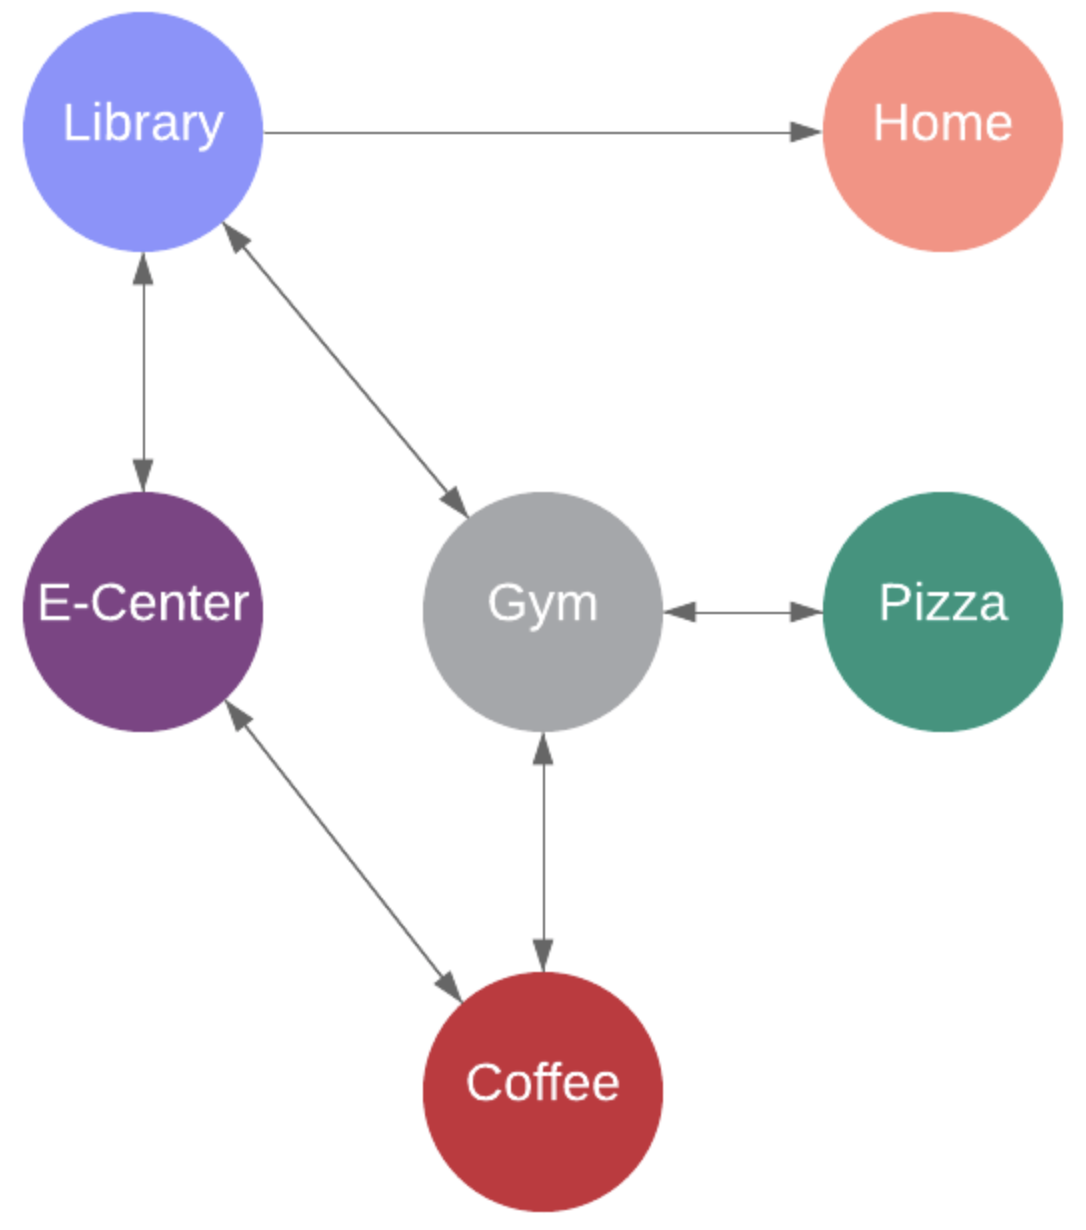
</div>

**Part A**: Stella is exhausted from a long day of researching whether [P=NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) so, naturally, she wants to go to the Coffee Shop (Coffee) to grab a coffee.  

Compute the probability that Stella **ends up** at the Coffee shop in her 
* (i) first, 
* (ii) second, 
* (iii) third stop after leaving from the E Center. 

**Calculate this by hand, showing your work in a markdown cell. You may leave answers as fractions or decimals. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:**  

Stella has a 1/2 probability of ending up at the coffee shop on her first stop. This is because there are only two directions to go after leaving the E Center.  

Stella has a 0 probability of ending up at the coffee shop on her second stop. This is becuase there is no way to end up at the coffee shop after two stops. Going to the library on the first stop only allows you to go to the gym or home, meaning you cannot go to the coffee shop on the second stop from that direction. Going to the coffee shop on the first stop only lets you leave the coffee shop, so there is no way to go to the coffee shop on the second stop from that direction. So overall, there is no way to get to the coffee shop on the second stop.  

This one is more complicated so I am going to write out the process instead of explaining it.  

Stella can only get to the coffee shop from the E Center and the Gym.  
Stella can only get to the E center from the Library or the Coffee Shop.  
Stella can only get to the gym from the Library or the Coffee Shop.  
We can disregard the pizza shop and Stella's home because there is no way to go from them to the coffee shop in 3 stops.  

C = Coffee shop
Co3 = Coffee shop on 3rd stop  
E = E Center  
L = Library  
H = Home  
G = Gym  
P = Pizza  

P(Co3) = (P(Co3 | Eo2) * ((P(Eo2 | Lo1) * P(Lo1)) + (P(Eo2 | Co1) * P(Co1)))) + (P(Co3 | Go2) * ((P(Go2 | Lo1) * P(Lo1)) + (P(Go2 | Co1) * P(Co1))))  
       = (.5 * (( .3 * .5) + (.5 * .5))) + (.3 * ((.3 * .5) + (.5 * .5)))  
       = (.5 * (.167 + .25)) + (.3 * (.167 + .25))  
       = (.5 * .417) + (.3 * (.417))  
       = .208 + .139  
       = .3472  

Thus, there is a .3472 (or 25/72) probability that stella ends up at the coffee shop on the third stop.

**Part B**: What is the probability that Stella gets to her house in exactly 2 stops after leaving the E-Center? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:**  

The only path for Stella to get home in 2 stops is by going to the Library then going Home.  
There is a .5 probability that Stella goes to the Library from the E Center.  
Then, there is a .33 probability that Stella goes Home from the Library.  
.5 * .33 = .167  
Thus, there is a .167 (or 1/6) probability that Stella goes home after exatcly 2 stops after leaving the E Center.

**Part C:** What is the probability that Stella gets to her house in exactly 3 stops after leaving the E-Center? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:**  

There is no possible path for Stella to take to get home in exactly 3 stops.  
Thus, there is a 0 probability that Stella gets to her house in exactly 3 stops after leaving the E Center.

**Part D:** What is the probability that Stella gets to her house in exactly 4 stops after leaving the E-Center? What is the probability that she gets to her house in 4 or less stops? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:**  

There are only four ways for Stella to get to her house in exatly 4 stops.
E Center > Coffee Shop > E Center > Library > Home  
E Center > Coffee Shop > Gym > Library > Home  
E Center > Library > E Center > Library > Home  
E Center > Library > Gym > Library > Home  

We can add up these probabilities to get the probability that Stella gets to her house in exactly 4 stops. Since the E Center and Gym always are in the 2nd stop and the Library is always on the third stop, we do not need to consider the first stops individually. We can consider them as a whole of the second stops.  

P(Ho4) = (P(Ho4 | Lo3) * P(Ho4)) * ((P(Lo3 | Eo2) * P(Eo2)) + (P(Lo3 | Go2) * P(Go2)))  
       = (.3) * ((.5 * .4167) + (.3 * .4167))  
       = .3 * 3.47  
       = .1157  
Thus, there is a .1157 (or 25/216) probability that Stella gets to her house in exactly 4 stops after leaving the E Center.  

To get the probability that Stella gets to her house in 4 stops or less, we add the chances that she gets to her house in exactly 4, 3, 2, and 1 stops.  
Stella cannot get to her house in exactly 1 or 3 stops, so they are zero.  
We got the probability that she would get to her house in 2 stops above.  

P(HL4) = P(Ho4) + P(Ho2)  
       = .1157 + .167  
       = .2824  
Thus, there is a .2834 (or 61/216) probability that Stella gets to her house in 4 or less stops.

**Part E:** Write a Python simulation to confirm that your by-hand calculations in **Part B**, **Part C**, and **Part D** are correct. Don't worry about simulating **Part A**. Your simulation code should simulate Stella's movement after leaving the E-Center and end when she reaches home. You should run the simulation at least 2000 times and record how many stops it took Stella to get home on each run (in an array... don't print 2000 results). Then use that array to print the simulated probability of reaching home in 2 stops, 3 stops, 4 stops, and 4 or less stops. ***Then summarize your results in a markdown cell***.

***Make sure to either comment your code, write exteremely readable code, or use a markdown cell to explain what your code does. Code that isn't immediately understandable with no additional explanation will lose you credit.***

**Solution:**


In [7]:
# Your code here.
# https://www.programiz.com/dsa/graph-adjacency-matrix
# https://www.tutorialspoint.com/python_data_structure/python_graphs.htm
# https://wiki.python.org/moin/ForLoop

# Create an array to store all answers to paths
answerarray = []

# Create a starting point and make a way to traverse the graph by making a random choice for the next stop.
def start(point1, adjancy_matrix):
    
    nextstop = adjancy_matrix[point1]
    x = np.random.choice(nextstop)
    return x

# Create the map that Stella is going to traverse, make a new stop, and count how many stops she is making along her path.
def find_path():

    #Create the map that Stella is going to traverse.
    beginning = 'E Center'
    mapmatrix = {"E Center":["Library","Coffee Shop"], "Library":["Home","Gym", "E Center"], "Home":[], "Gym":["Library","Pizza Shop","Coffee Shop"],  "Pizza Shop":["Gym"], "Coffee Shop":["E Center", "Gym"]}

    #Count how many stops Stella is making along her path. Also make a new stop if Stella is not home.
    stopcount = 0
    while beginning != 'Home':
        stopcount = stopcount + 1
        beginning = start(beginning, mapmatrix)
    
    return stopcount

# Have Stella find her way home 2000 times and store information in answers array.
for x in range(0, 2001):
    
    answerarray.append(find_path())
    
# Need to "create array" using np.array otherwise all answers will be 0.
answerarray = np.array(answerarray)

# a = (np.sum(answerarray == 1) / len(answerarray)).str
# b = (np.sum(answerarray == 2) / len(answerarray)).str
# c = (np.sum(answerarray == 3) / len(answerarray)).str
# d = (np.sum(answerarray == 4) / len(answerarray)).str

# Print probability of Stella getting home based on the number of stops.
print(np.sum(answerarray == 1) / len(answerarray))
print(np.sum(answerarray == 2) / len(answerarray))
print(np.sum(answerarray == 3) / len(answerarray))
print(np.sum(answerarray == 4) / len(answerarray))
print((np.sum(answerarray == 1) / len(answerarray)) + (np.sum(answerarray == 2)/len(answerarray)) + (np.sum(answerarray == 3)/len(answerarray)) + (np.sum(answerarray == 4)/len(answerarray)))

0.0
0.16141929035482258
0.0
0.11944027986006997
0.28085957021489255


These results are similar to my by-hand calculations for parts B, C, and D.

**Part F:** Make a frequency histogram of the number of stops it takes Stella to get home. Use a bin size of 1 and make sure to include all the data in the histogram (e.g. don't accidentally exclude data from your simulation by making too few bins). To make the graph more legible, make it a "bar" histogram with black edges. Look up the "histtype" and "ec" arguments to the histogram function in Matplotlib if you don't know how to do this. To further our goal of having this data look nice, make the figure 15 inches wide and 8 inches tall. Look up the "figsize" argument in Matplotlib if you don't know how to do this. Remember to include axis labels and a title. Make the graph nice and readable. Use the plt.show() function to avoid printing out extraneous information.

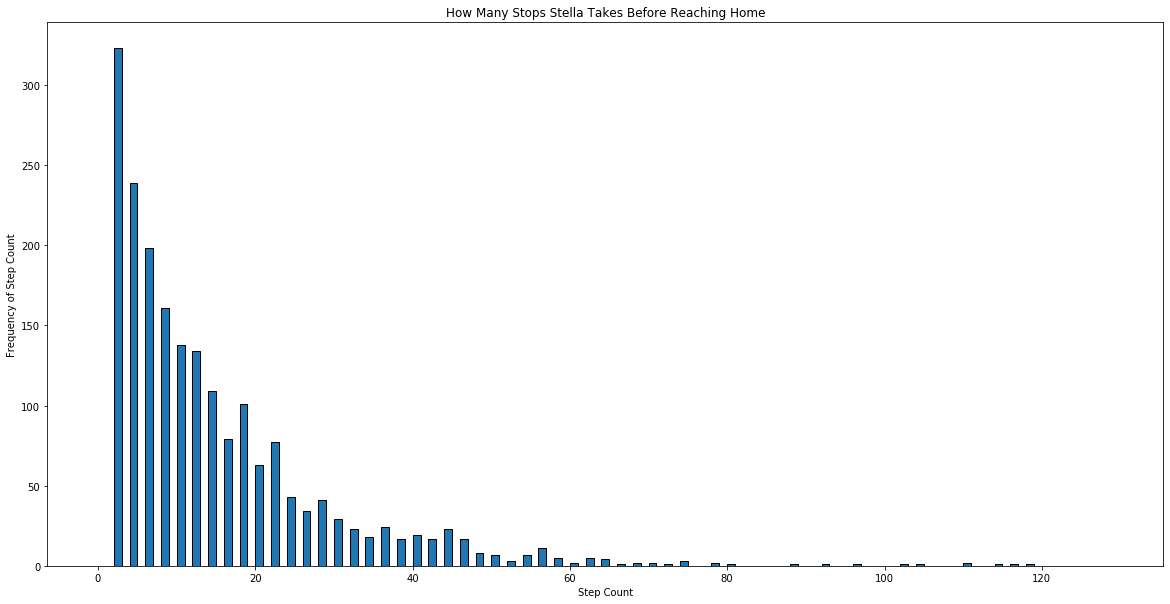

In [8]:
# Your code here.
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html

my_bins = range(0, 130, 1)

fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('How Many Stops Stella Takes Before Reaching Home')
ax.set_xlabel('Step Count')
ax.set_ylabel('Frequency of Step Count')

fig = plt.hist(answerarray, bins = my_bins, histtype='bar', edgecolor = "black")

plt.show()

**Part G:** Did you find it easier to calculate the probabilities by hand or simulate them with Python? What are some of the pro's and con's of simulating the probabilities versus calculating them by hand. Do you think it would be feasible to calculate the probabilities by hand for a graph that was much larger (eg. 100 Locations and 500 Paths)?

**Solution:**  

I personally found it easier to calculate the probabilities by hand at first, but once the python function was finished it was much easier to use. One pro of calculating by hand is that we do not have to redo the calculation over and over in order to get closer to the correct answer. The problem with hand calculations however is that they are much more difficult the more stops we include. We would have to write very long and intensive calculations for a large number of stops. This is a pro for the python code however. Now that it is finished, we can input whatever stop count we want and the function will give us a close to correct answer (dependant on how many times we run it). Due to this, I do not think that it would be feasible to calculate teh probabilities by hand for a graph that was much larger or for larger stop counts.

***


### [20 points] Problem 3  

As part of the Computer Science Jedi training, John and Tom will be having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* In each round John tries to strike Tom, then Tom tries to strike John.
* If John manages to strike Tom, then John is awarded a point, and similarly if Tom manages to strike John, then Tom is awarded a point.
* If a round ends in a tie, then John and Tom proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $J$ be the event that "John wins the duel", $F$ be the event that "the duel finishes after the first round of lightsaber strikes", and $G$ be the event that "the duel goes on after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes. Furthermore, John successfully lands his lightsaber strikes with probability $p$, and Tom lands his strikes with probability $q$.

**Part A**: The duel will continue until John or Tom wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that John has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds followed by "..." to show that you have established a pattern.

**Solution**:  

Sample space $\Omega$ is equal to: $\Omega$ = {MM, MH, HM, HH, MMMH, HHHM, MMHM, HHMH, MHMM, HMHH, HMMM, MHHH, ... }

**Part B**: Determine $P(J \mid F)$ in terms of $p$ and $q$.

**Solution**:  

The duel can end in one round for John or the duel can continue. For the duel to end in one round, the sample space would be $\Omega$ = {MH, HM}.  
The way for John to win in the first round would be HM.  
The probability would be: P(HM) / P($\Omega$).  
This comes out to: P(HM) / P({MH, HM}).
HM is = p(1 - q) and P({MH, HM}) = p(1 - q) + q(1 - p).  
 
Considering all of this,  

$P(J \mid F)$ = (p(1 - q)) / (p(1 - q) + q(1 - p))


**Part C**: Explain why events $J$ and $G$ are independent. 

**Solution**:  

Events J and G are independant because John (or Tom) will always have the same chance of winning despite what round the duel has progressed towards.  
This is the same as P(J | G) == P(J).


**Part D**: Use the Law of Total Probability to show that $P(J) = p(1-q) + (2pq - p - q +1) ~P(J \mid G)$. 

**Solution**:  

P(J) = p(1 - q) + ((2pq - p - q + 1) * P(J | G))  
     = ((p(1 - q)/(p + q - 2pq)) * (p + q - 2pq)) + ((2pq - p - q + 1) * P(J | G))  
     = ((p(1 - q)/(p + q - 2pq)) * (p(1 - q) + q(1 - p))) + ((pq + (1-p)(1-q)) * P(J | G))  
     = ((p(1 - q)/(p + q - 2pq)) * (P(MH) + P(HM))) + ((P(MM) + P(HH)) * P(J | G))  
     = ((p(1 - q)/(p + q - 2pq)) * P(MH, HM)) + (P(MM, HH) * P(J | G))  
     = (P(J | F) * P(MH, HM)) + (P(MM, HH) * P(J | G))  
     = (P(J | F) * P(F)) + (P(G) * P(J | G))  
     
Since P(J) does indeed = (P(J | F) * P(F)) + (P(G) * P(J | G)), we can conclude that:  

P(J) = p(1 - q) + ((2pq - p - q + 1) * P(J | G))  

**Part E**: Use the independence property from **Part B** that $P(J \mid G) = P(J)$ to determine $P(J)$ in terms of $p$ and $q$. 

**Solution**:  

P(J) = (p(1 - q)) + ((2pq - p - q + 1) * P(J))  
Subtract ((2pq - p - q + 1) * P(J)) from both sides.  
P(J) - ((2pq - p - q + 1) * P(J)) = p(1 - q)  
Pull out P(J) on left side.  
P(J) * (1 - (2pq - p - q + 1)) = p(1 - q)  
Divide (1 - (2pq - p - q + 1) from both sides.  
P(J) = (p(1 - q)) / ((1 - (2pq - p - q + 1))  
Simplify.  
P(J) = (p(1 - q)) / (-2pq + p + q)  

***


### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of <a href="https://en.wikipedia.org/wiki/Monopoly_(game)">Monopoly</a>). The game consists of a round board with 40 cells numbered from $0$ to $39$, where cell $0$ and would-be $40$ are coincident and called **GO**. A player starts at **GO** with \$200 in their pocket. On each turn the player rolls a pair of dice and move the number of cells equal to the sum of two dices. Landing on different cells have different results:

- Cells 2，8，13，17，25, and 33 causes you two draw a card. The cards may tell you to collect \\$50 or \\$100, or pay the bank \\$50 or \\$75. There is always an equal probability associated with drawing each of these possible cards.

<p> </p>

- Cell 1, 7, and 10 does not trigger any actions.

<p> </p>

- Cell 20 is **Lottery**. If a player lands on cell 20, then they are awarded a Lottery bonus of \\$500, this should be the input variable to your `miniopoly_turn` function called `bonus`.
<p> </p>

- Cell 30 is **Go To Jail**. If a player lands on cell 30, they would be locked up in jail.

<p> </p>

- If a player starts a turn in **Jail**, they roll a pair of dice:

    - If the player rolls doubles (i.e. the dice have equal values), then the player moves from Cell 10 a number of Cells equal to the sum of the dice.
    
    - If the player rolls anything other than doubles, then she pays the bank \\$25 and remains in **Jail**.
    
<p> </p>

- If a player passes or lands on **GO**, they collect \\$200.

<p> </p>

- If a player lands on other cells not mentioned above, they pay the bank an amount equal to the cell number (e.g. if they land on cell 19, they pay the bank \\$19).

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function `miniopoly_turn` below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves and the amount of the Lottery (Cell 20) bonus, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.

In [9]:
def miniopoly_turn(state, cash, bonus=500):
    # roll two dice
    a = np.random.randint(1, 7)
    b = np.random.randint(1, 7)
    
    # Your code here.
    
    if state == 20:
        
        cash = cash + bonus

    if state == 30:
        
        if a == b:
            state = 10
            
        else:
            cash = cash - 25
            
    if state >= 40:
        
        cash = cash + 200
        state = state - 40
        
    if state != 30:
        
        state = state +(a+b)
    
    if state in [2, 8, 13, 17, 25, 33]:
        
        cash = cash + np.random.choice([50, 100, -50, -75])
        
    elif state not in [1, 7, 10, 20, 30]:
        
        cash = cash - 19
        
    return state, cash

**Part B:** Use your function from **Part A** to stimulate at least 5000 games of Miniopoly that consists 20 turns and 40 turns, respectively. Make a **density** histogram of the player's cash amount at the end of the game under the both the 20-turn and 40-turn scenarios. Plot both histograms on the same set of axes, the histogram box faces should be slightly transparent and of different colors, so as to be able to tell the 2 game-length scenarios apart. For both histograms, use bins of width \$250, starting at 0 on the left and extending as far to the right as needed. As always, be sure to label your axes and include an informative legend.

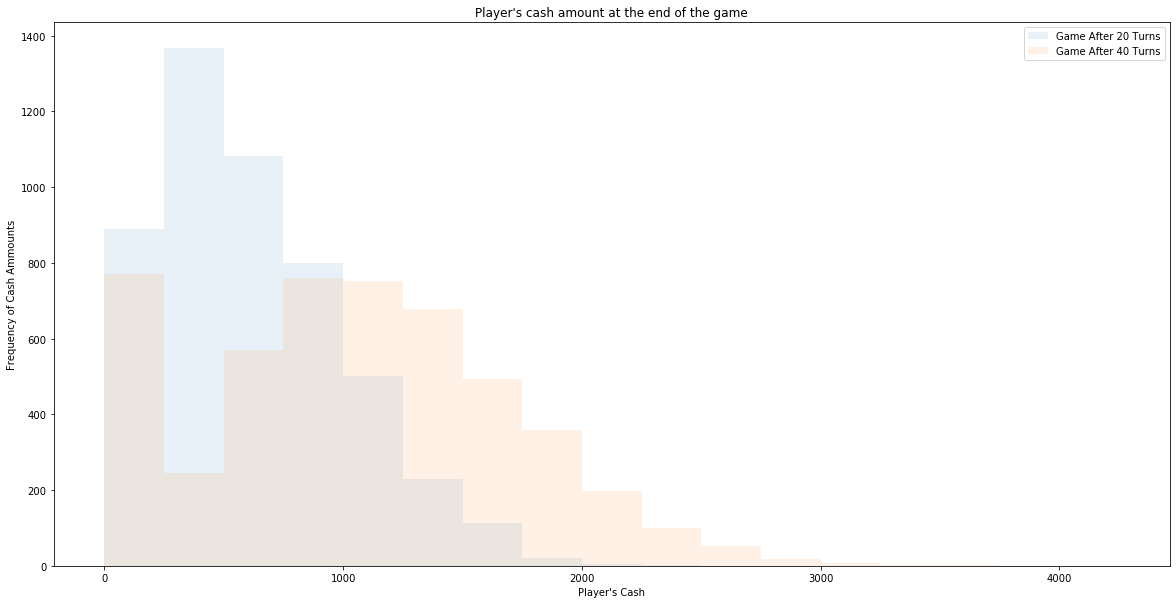

In [10]:
# Your code here.
    
def rungame(turncount):
    
    state = 0
    cash = 200
    
    for x in range(turncount):
        
        state, cash = miniopoly_turn(state, cash)
        
        if cash <= 0:
            break
            
    if cash <= 0:
        return 0
    
    else:
        return cash

run20 = []
run40 = []

for x in range(0, 5001):
    run20.append(rungame(20))

for x in range(0, 5001):
    run40.append(rungame(40))

plt.figure(figsize = (20, 10))
plt.hist(pd.Series(run20), bins = range(0, 4500, 250), alpha = 0.1, label = 'Game After 20 Turns')
plt.hist(pd.Series(run40), bins = range(0, 4500, 250), alpha = 0.1, label = 'Game After 40 Turns')
plt.title('Player\'s cash amount at the end of the game')
plt.ylabel('Frequency of Cash Ammounts')
plt.xlabel('Player\'s Cash')
plt.legend(), plt.show();

**Part C**: Use your code from **Part A** and **Part B** to estimate the probability that a player goes bankrupt in the 60 turns. Simulate at least 10,000 games.

In [11]:
def rungame2(turncount):
    
    state = 0
    cash = 200
    
    for x in range(turncount):
        
        state, cash = miniopoly_turn(state, cash)
        
        if cash <= 0:
            break
            
    if cash <= 0:
        return 0
    
    else:
        return cash

# run60 = []

incrementer = 0
for x in range(0, 10001):
    if rungame2(60) == 0:
        incrementer = incrementer + 1
print(incrementer / 10000)

0.1378


**Part D**:  Use your code from **Part A** and **Part B** to estimate the probability that a player goes bankrupt in a 60 turn game  _given_ that they have been to **Jail** at least twice and never won a **Lottery**.  Is a player more or less likely to go bankrupt if they've been to jail twice and never won a **Lottery**? Simulate at least 10,000 games.

NOTE: If a player is already in jail and failed to roll a double, she will remain in Jail, which would increase the number of time she has been to jail by one.

In [12]:
# Your code here.
def bankruptgame():
    
    
    state = 0
    cash = 200
    enterjail = 0
    winlotto = 0
    
    for turn in range(0,60):
        
        state, cash = miniopoly_turn(state,cash)
        
        if state == 30:
            enterjail = enterjail + 1
            
        if state == 20:
            winlotto = winlotto + 1
            
        if cash <= 0:
            break
            
    #if enterjail >= 2 and winlotto == 0:
    #   if cash > 0:
    #       return cash
    #   else:
    #        0
            
    if enterjail >= 2 and winlotto == 0:
        return cash if cash > 0 else 0
    
    else:
        return bankruptgame()
    

incrementer = 0
for i in range(0, 10001):
    
    if bankruptgame() == 0:
        incrementer = incrementer + 1
        
print(incrementer / 10000)

0.55


***


### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1. 

**Part A**:  Compute $P(C)$ by hand. 


**Solution:**  

There are six possible situations where rolls can be close to each other.  
1 and 2  
2 and 3  
3 and 4  
4 and 5  
5 and 6  

But, the inbetween rolls can be reversed, so we have a larger space for the two rolls to be close in value.  
1 and 2  
2 and 1, 2 and 3  
3 and 2, 3 and 4  
4 and 3, 4 and 5  
5 and 4, 5 and 6  
6 and 5  

Edge possible rolls are 1/18 and inbetween rolls are 1/12.  

So,  
P(C) = 1/18 + 1/12 + 1/12 + 1/12 + 1/12 + 1/18 = 0.44

**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [16]:
# Your code here.

def pairs(numTrials):

    possrollarray = np.array([1,2,3,4,5,6])
    incrementer = 0
    
    for i in range(numTrials):
        
        x = np.random.choice(possrollarray)
        y = np.random.choice(possrollarray)
        
        if (x == y) or (x + 1 == y) or (x - 1 == y):
            incrementer += 1
            
    return incrementer/numTrials

print(pairs(10000))

0.4455


My estimate does agree with my exact calculation from Part A.

**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

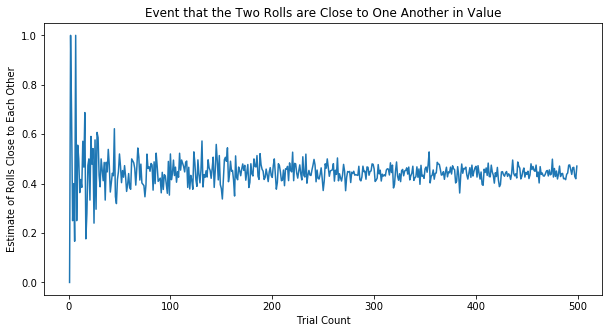

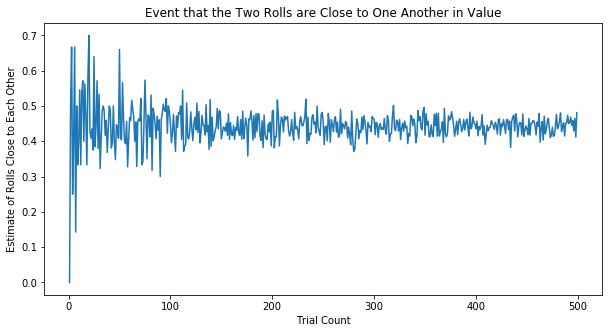

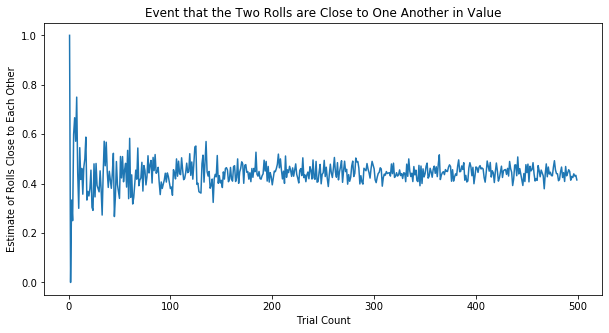

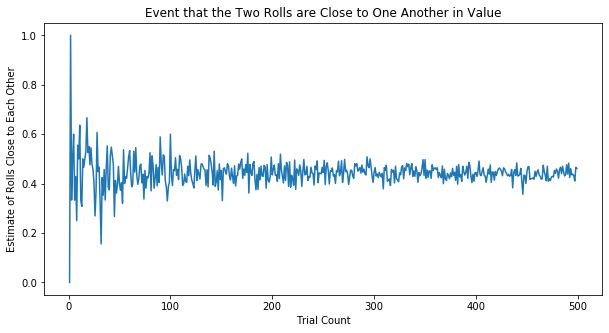

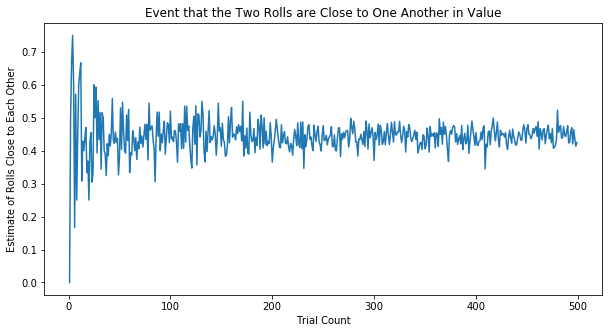

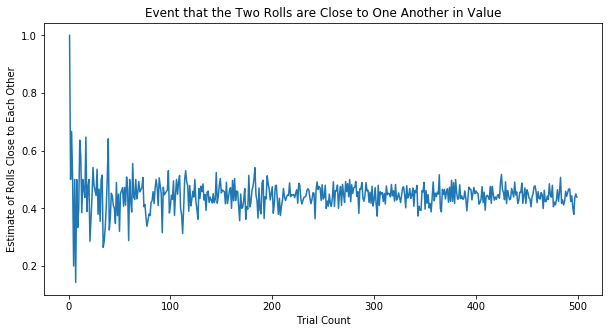

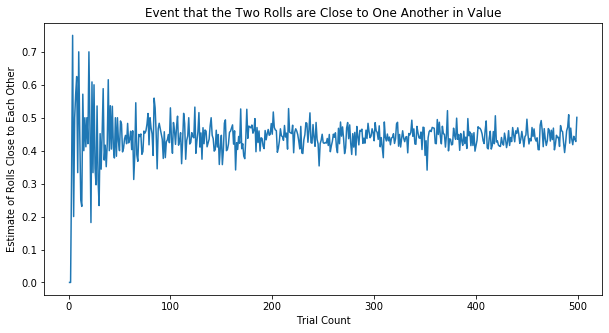

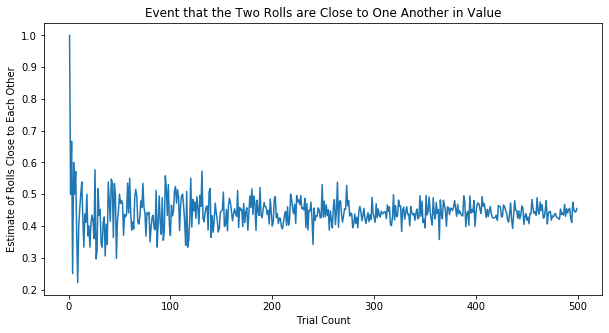

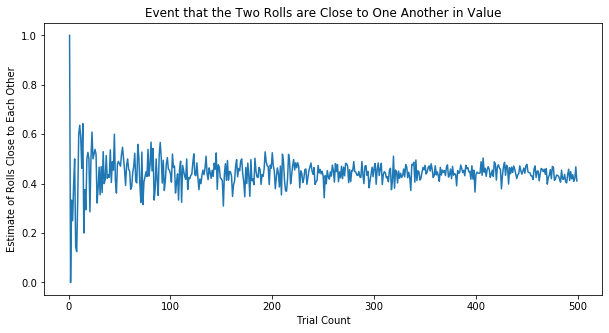

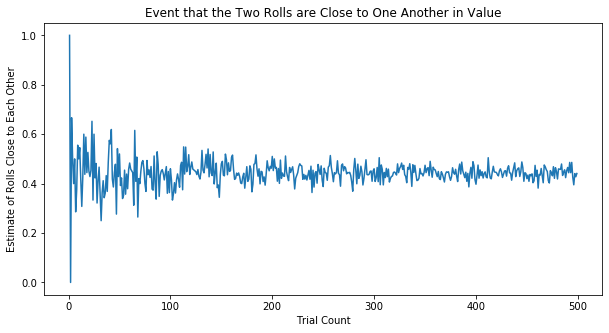

In [32]:
# Your code here.

def plotter():
    
    x = list()
    y = list()

    for z in range(1, 500):
            x.append(z)
            y.append(np.average(pairs(z)))

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x, y)
    ax.set_title("Event that the Two Rolls are Close to One Another in Value")
    ax.set_ylabel("Estimate of Rolls Close to Each Other")
    ax.set_xlabel("Trial Count")
    
for x in range(0, 10):
    plotter()

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

**Solution:**  

I ran this at 50000 trials but after an hour and a half the simulation did not finish. Due to this, I changed it to 500 and hope that it is sufficient enough to demonstrait the property of the graph converging on the calculated value.

As the number of trials increase, the graphs tend to become centered around the average that I got from my hand calculations. This is evident by the graphs above.